In [1]:
import pandas as pd
import numpy as np

import mysql.connector
from sqlalchemy import create_engine
import pandas.io.sql as psql
import sqlalchemy

from dateutil import parser
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
database_username = 'smarsproddbuser@mbt-smars-mysql'
database_password = 'modern@1234'
database_ip       = 'mbt-smars-mysql.mysql.database.azure.com'
database_name     = 'mainschema'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [3]:
df = pd.read_sql('SELECT * FROM brokerperformance2016', con=database_connection)
del df['index']
df

,Name,Hit Ratio,Avg. Growth,Total Recos
0,KRChoksey,69,50,117
1,AUM Capital,77,70,9
2,Religare,79,36,222
3,Enochventures.com,52,34,17
4,Edelweiss,72,35,278
5,Motilal Oswal,69,37,299
6,Kotak Securities,82,43,75
7,Angel Broking,54,36,66
8,Geojit Financial Services,83,42,118
9,Centrum,72,40,127


## Growth

<function matplotlib.pyplot.show(*args, **kw)>

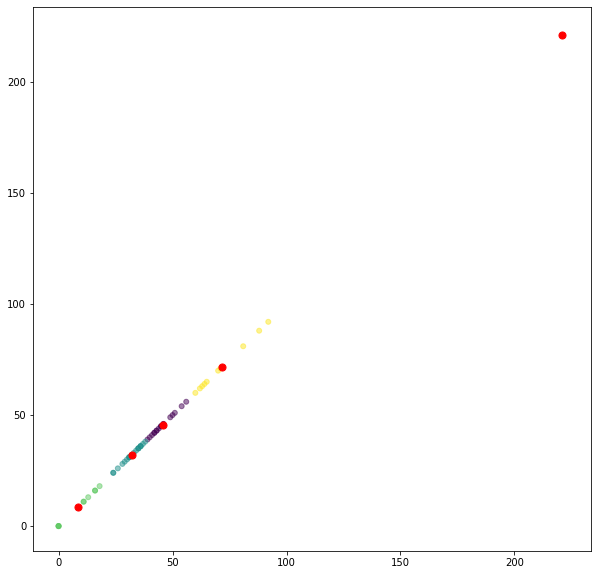

In [4]:
X1 = df[['Avg. Growth','Avg. Growth']]
model1 = KMeans(n_clusters=5).fit(X1)
centroids1 = model1.cluster_centers_
sortedcentroids1 = centroids1[:,0].copy()
sortedcentroids1.sort(axis=0)
labeldict1 = {}
for i in centroids1[:,0] :
    x = list(sortedcentroids1).index(i)
    y = list(centroids1[:,0]).index(i)
    labeldict1[y] = x
    unsortedlabels1 = model1.predict(X1)
sortedlabels1 = []
for element in unsortedlabels1 :
    sortedlabels1.append(labeldict1[element]+1)
plt.figure(figsize=(10,10))
plt.scatter(df['Avg. Growth'], df['Avg. Growth'], c= unsortedlabels1, s=25, alpha=0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)
plt.show
#print("-----------------------------------------------------")
#print("unsortedlabels1 : ",unsortedlabels1)
#print("-----------------------------------------------------")
#print("sortedlabels1 : ",sortedlabels1)
#print("-----------------------------------------------------")
#print("labeldict1 : ",labeldict1)
#print("-----------------------------------------------------")
#print("centroids1 : ",centroids1[:, 0])
#print("-----------------------------------------------------")
#print("sortedcentroids1 : ",sortedcentroids1)
#print("-----------------------------------------------------")

## Total Recos

<function matplotlib.pyplot.show(*args, **kw)>

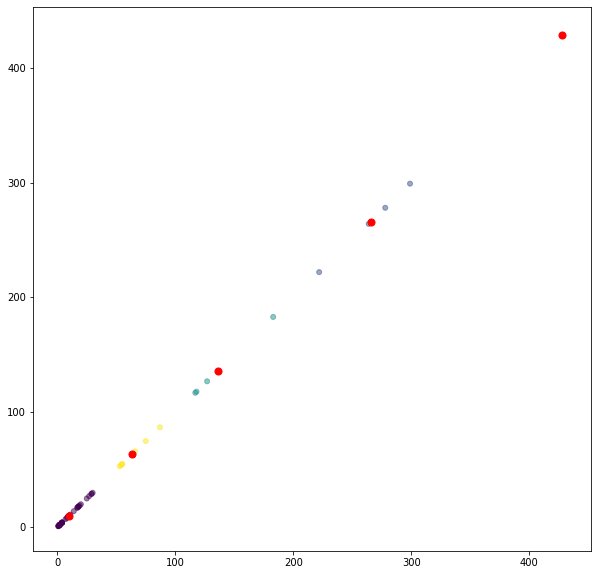

In [5]:
X2 = df[['Total Recos','Total Recos']]
model2 = KMeans(n_clusters=5).fit(X2)
centroids2 = model2.cluster_centers_
sortedcentroids2 = centroids2[:,0].copy()
sortedcentroids2.sort(axis=0)
labeldict2 = {}
for i in centroids2[:,0] :
    x = list(sortedcentroids2).index(i)
    y = list(centroids2[:,0]).index(i)
    labeldict2[y] = x
    unsortedlabels2 = model2.predict(X2)
sortedlabels2 = []
for element in unsortedlabels2 :
    sortedlabels2.append(labeldict2[element]+1)
plt.figure(figsize=(10,10))
plt.scatter(df['Total Recos'], df['Total Recos'], c= unsortedlabels2, s=25, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.show

## Hit Ratio

<function matplotlib.pyplot.show(*args, **kw)>

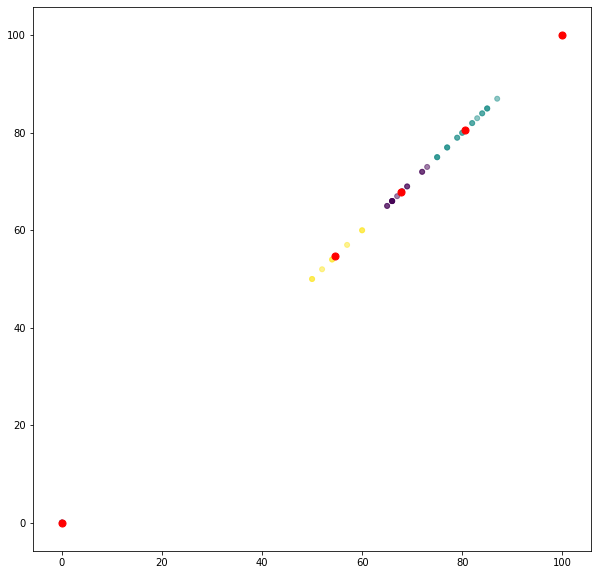

In [6]:
X3 = df[['Hit Ratio','Hit Ratio']]
model3 = KMeans(n_clusters=5).fit(X3)
centroids3 = model3.cluster_centers_
sortedcentroids3 = centroids3[:,0].copy()
sortedcentroids3.sort(axis=0)
labeldict3 = {}
for i in centroids3[:,0] :
    x = list(sortedcentroids3).index(i)
    y = list(centroids3[:,0]).index(i)
    labeldict3[y] = x
    unsortedlabels3 = model3.predict(X3)
sortedlabels3 = []
for element in unsortedlabels3 :
    sortedlabels3.append(labeldict3[element]+1)
plt.figure(figsize=(10,10))
plt.scatter(df['Hit Ratio'], df['Hit Ratio'], c= unsortedlabels3, s=25, alpha=0.5)
plt.scatter(centroids3[:, 0], centroids3[:, 1], c='red', s=50)
plt.show

In [7]:
dfanalysis = pd.DataFrame({'broker': df['Name'], 'Hit Ratio': sortedlabels3,'Avg. Growth' : sortedlabels1, 'Total Recos' : sortedlabels2})
dfanalysis

,broker,Hit Ratio,Avg. Growth,Total Recos
0,KRChoksey,3,3,3
1,AUM Capital,4,4,1
2,Religare,4,2,4
3,Enochventures.com,2,2,1
4,Edelweiss,3,2,4
5,Motilal Oswal,3,2,4
6,Kotak Securities,4,3,2
7,Angel Broking,2,2,2
8,Geojit Financial Services,4,3,3
9,Centrum,3,3,3


## Naive Bayes

In [8]:
dictstar1 = {1:1,   2:0.8, 3:0.6, 4:0.4, 5:0 }
dictstar2 = {1:0.8, 2:1,   3:0.8, 4:0.6, 5:0.4 }
dictstar3 = {1:0.6, 2:0.8, 3:1,   4:0.8, 5:0.6 }
dictstar4 = {1:0.4, 2:0.6, 3:0.8, 4:1,   5:0.6 }
dictstar5 = {1:0.2, 2:0.4, 3:0.6, 4:0.8, 5:1 }

In [9]:
star = []
for index, row in dfanalysis.iterrows():
    hr = row['Hit Ratio']
    ag = row['Avg. Growth']
    tr = row['Total Recos']
    probabilities = []
    probabilities.append(dictstar1[hr]*dictstar1[ag]*dictstar1[tr]) 
    probabilities.append(dictstar2[hr]*dictstar2[ag]*dictstar2[tr]) 
    probabilities.append(dictstar3[hr]*dictstar3[ag]*dictstar3[tr]) 
    probabilities.append(dictstar4[hr]*dictstar4[ag]*dictstar4[tr]) 
    probabilities.append(dictstar5[hr]*dictstar5[ag]*dictstar5[tr]) 
    rating = probabilities.index(max(probabilities))+1
    star.append(rating)

In [10]:
dfanalysis['Rating'] = star
dfanalysis

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,KRChoksey,3,3,3,3
1,AUM Capital,4,4,1,4
2,Religare,4,2,4,4
3,Enochventures.com,2,2,1,2
4,Edelweiss,3,2,4,3
5,Motilal Oswal,3,2,4,3
6,Kotak Securities,4,3,2,3
7,Angel Broking,2,2,2,2
8,Geojit Financial Services,4,3,3,3
9,Centrum,3,3,3,3


In [11]:
dfanalysis.to_sql(con=database_connection, name='finalrating2016', if_exists='replace')